Import Library

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import itertools 

import warnings
warnings.filterwarnings('ignore')

In this notebook, I want to analyze who is the best player in vct 2024 and how the best team will look like. At this point, I have no idea on what to do. But we will see.

In [2]:
player_data = pd.read_csv("dataset/vct_2024/players_stats/players_stats.csv")
player_data.head()

,Tournament,Stage,Match Type,Player,Teams,Agents,Rounds Played,Rating,Average Combat Score,Kills:Deaths,...,First Deaths Per Round,Headshot %,Clutch Success %,Clutches (won/played),Maximum Kills in a Single Map,Kills,Deaths,Assists,First Kills,First Deaths
0,Valorant Champions 2024,Playoffs,Upper Quarterfinals,Boo,Team Heretics,astra,26,0.75,138,0.58,...,0.08,21%,22%,2/9,11,11,19,14,1,2
1,Valorant Champions 2024,Playoffs,Upper Quarterfinals,Boo,Team Heretics,fade,16,1.10,185,1.38,...,0.00,21%,NaN,NaN,11,11,8,3,2,0
2,Valorant Champions 2024,Playoffs,Upper Quarterfinals,Boo,Team Heretics,"astra, fade",42,0.88,162,0.81,...,0.05,21%,22%,2/9,11,22,27,17,3,2
3,Valorant Champions 2024,Playoffs,Upper Quarterfinals,benjyfishy,Team Heretics,cypher,26,0.85,203,0.86,...,0.15,34%,NaN,NaN,18,18,21,3,2,4
4,Valorant Champions 2024,Playoffs,Upper Quarterfinals,benjyfishy,Team Heretics,killjoy,16,1.36,169,2.40,...,0.00,28%,50%,1/2,12,12,5,2,1,0


In [3]:
player_data.shape

(15030, 25)

In valorant, a team of 5 is usually consist of 1 duelist, 1 controller, 1 sentinel, 1 initiator, and 1 flex (can play most role if not all) player. Right now, I will not prioritize IGL within a team since I think it will make the code harder to do (and also because PRX can still play good without proper IGL). 

I will choose the best player for each role and combine them to make the best team. For someone to be considered as a duelist/sentinel/controller/initiator, they need to play the role for about 70 % of the time. For flex role, they should be able to play more than 10 agent to be considered as a flex. 

In [5]:
agent_dictionary = { 
    "sentinel": ["sage", "cypher", "killjoy", "chamber", "deadlock", "vyse"],
    "controller": ["brimstone", "viper", "omen", "astra", "harbor", "clove"],
    "duelist": ["jett", "reyna", "phoenix", "raze", "yoru", "neon", "iso"],
    "initiator": ["sova", "breach", "skye", "kayo", "fade", "gekko", "tejo"]
}

inverted_agent_dictionary = {
  'sage': 'sentinel',
  'cypher': 'sentinel',
  'killjoy': 'sentinel',
  'chamber': 'sentinel',
  'deadlock': 'sentinel',
  'vyse': 'sentinel',
  'brimstone': 'controller',
  'viper': 'controller',
  'omen': 'controller',
  'astra': 'controller',
  'harbor': 'controller',
  'clove': 'controller',
  'jett': 'duelist',
  'reyna': 'duelist',
  'phoenix': 'duelist',
  'raze': 'duelist',
  'yoru': 'duelist',
  'neon': 'duelist',
  'iso': 'duelist',
  'sova': 'initiator',
  'breach': 'initiator',
  'skye': 'initiator',
  'kayo': 'initiator',
  'fade': 'initiator',
  'gekko': 'initiator',
  'tejo': 'initiator'
}

# flatten list
all_agents = list(itertools.chain.from_iterable([agent for agent in agent_dictionary.values()]))

I will only use the all stages data, since it will compile all data from 1 particular vct event

In [6]:
player_data = player_data[player_data["Stage"] == "All Stages"]
player_data

,Tournament,Stage,Match Type,Player,Teams,Agents,Rounds Played,Rating,Average Combat Score,Kills:Deaths,...,First Deaths Per Round,Headshot %,Clutch Success %,Clutches (won/played),Maximum Kills in a Single Map,Kills,Deaths,Assists,First Kills,First Deaths
962,Valorant Champions 2024,All Stages,All Match Types,LuoK1ng,Trace Esports,astra,18,1.32,246,1.25,...,0.00,27%,0%,0/6,15,15,12,11,0,0
963,Valorant Champions 2024,All Stages,All Match Types,LuoK1ng,Trace Esports,brimstone,63,1.07,209,1.20,...,0.03,34%,0%,0/5,21,49,41,20,6,2
964,Valorant Champions 2024,All Stages,All Match Types,LuoK1ng,Trace Esports,omen,127,0.99,190,1.03,...,0.06,33%,0%,0/18,27,91,88,42,9,7
965,Valorant Champions 2024,All Stages,All Match Types,LuoK1ng,Trace Esports,"astra, brimstone, omen",208,1.04,202,1.10,...,0.04,33%,0%,0/29,27,155,141,73,15,9
966,Valorant Champions 2024,All Stages,All Match Types,heybay,Trace Esports,breach,65,0.90,181,0.82,...,0.08,32%,10%,1/10,18,41,50,25,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15025,Champions Tour 2024: EMEA Kickoff,All Stages,All Match Types,nataNk,Gentle Mates,raze,39,0.95,206,1.04,...,0.13,29%,0%,0/1,23,29,28,4,10,5
15026,Champions Tour 2024: EMEA Kickoff,All Stages,All Match Types,nataNk,Gentle Mates,"phoenix, raze",104,0.93,217,1.00,...,0.22,27%,29%,2/7,24,79,79,18,24,23
15027,Champions Tour 2024: EMEA Kickoff,All Stages,All Match Types,TakaS,Gentle Mates,raze,48,1.10,234,1.11,...,0.08,20%,25%,1/4,26,40,36,8,5,4
15028,Champions Tour 2024: EMEA Kickoff,All Stages,All Match Types,TakaS,Gentle Mates,yoru,56,1.16,278,1.37,...,0.14,24%,0%,0/3,26,56,41,13,11,8


Then, I want to check any missing values. In fact, there are some!

In [7]:
player_data.isna().any()

Tournament                        False
Stage                             False
Match Type                        False
Player                            False
Teams                             False
Agents                            False
Rounds Played                     False
Rating                             True
Average Combat Score              False
Kills:Deaths                      False
Kill, Assist, Trade, Survive %     True
Average Damage Per Round           True
Kills Per Round                   False
Assists Per Round                 False
First Kills Per Round              True
First Deaths Per Round             True
Headshot %                         True
Clutch Success %                   True
Clutches (won/played)              True
Maximum Kills in a Single Map     False
Kills                             False
Deaths                            False
Assists                           False
First Kills                       False
First Deaths                      False


Let's see each column with missing values

In [8]:
col_with_missing_values = ["Rating", "Kill, Assist, Trade, Survive %", "Average Damage Per Round", "First Kills Per Round", "First Deaths Per Round", "Headshot %", "Clutch Success %", "Clutches (won/played)"]
# player_data.loc[:, col_with_missing_values]

data_with_missing_values = player_data[player_data["Rating"].isna() | player_data["Kill, Assist, Trade, Survive %"].isna() | 
            player_data["Average Damage Per Round"].isna() | player_data["First Kills Per Round"].isna() | 
            player_data["First Deaths Per Round"].isna() | player_data["Headshot %"].isna() | 
            player_data["Clutch Success %"].isna() | player_data["Clutches (won/played)"].isna()]

In [9]:
for col in col_with_missing_values:
    set_tournament = set(data_with_missing_values[data_with_missing_values[col].isna()]["Tournament"].tolist())
    print(col, set_tournament, "\n")

Rating {'Champions Tour 2024: Masters Shanghai', 'Champions Tour 2024: China Stage 1', 'Champions Tour 2024: China Kickoff', 'Champions Tour 2024: China Stage 2'} 

Kill, Assist, Trade, Survive % {'Champions Tour 2024: Masters Shanghai', 'Champions Tour 2024: China Stage 1', 'Champions Tour 2024: China Kickoff', 'Champions Tour 2024: China Stage 2'} 

Average Damage Per Round {'Champions Tour 2024: China Stage 1', 'Champions Tour 2024: China Kickoff'} 

First Kills Per Round {'Champions Tour 2024: China Stage 1', 'Champions Tour 2024: China Kickoff'} 

First Deaths Per Round {'Champions Tour 2024: China Stage 1', 'Champions Tour 2024: China Kickoff'} 

Headshot % {'Champions Tour 2024: Masters Shanghai', 'Champions Tour 2024: China Stage 1', 'Champions Tour 2024: China Kickoff', 'Champions Tour 2024: China Stage 2'} 

Clutch Success % {'Champions Tour 2024: Masters Shanghai', 'Champions Tour 2024: China Kickoff', 'Champions Tour 2024: EMEA Stage 2', 'Champions Tour 2024: Masters Madrid

- After seeing the data, we can see that All events in China doesn't give rating, Kill, Assist, Trade, Survive % (KAST), and Headshot.
- We can also see that China Kickoff and China Stage 1 doesn't give average damage per round, first kill per round (fkpr) data and (fdpr) data. 
- While clutch success and clutches is evident in all events, we need to investigate further 

In [10]:
tournament_list = player_data["Tournament"].unique().tolist()

In [12]:
for tournament in tournament_list:
    display(tournament)
    display(player_data[player_data["Tournament"] == tournament].info())

'Valorant Champions 2024'

<class 'pandas.core.frame.DataFrame'>
Index: 335 entries, 962 to 1296
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Tournament                      335 non-null    object 
 1   Stage                           335 non-null    object 
 2   Match Type                      335 non-null    object 
 3   Player                          335 non-null    object 
 4   Teams                           335 non-null    object 
 5   Agents                          335 non-null    object 
 6   Rounds Played                   335 non-null    int64  
 7   Rating                          335 non-null    float64
 8   Average Combat Score            335 non-null    int64  
 9   Kills:Deaths                    335 non-null    float64
 10  Kill, Assist, Trade, Survive %  335 non-null    object 
 11  Average Damage Per Round        335 non-null    float64
 12  Kills Per Round                 335 no

None

'Champions Tour 2024: Americas Stage 2'

<class 'pandas.core.frame.DataFrame'>
Index: 254 entries, 2125 to 2378
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Tournament                      254 non-null    object 
 1   Stage                           254 non-null    object 
 2   Match Type                      254 non-null    object 
 3   Player                          254 non-null    object 
 4   Teams                           254 non-null    object 
 5   Agents                          254 non-null    object 
 6   Rounds Played                   254 non-null    int64  
 7   Rating                          254 non-null    float64
 8   Average Combat Score            254 non-null    int64  
 9   Kills:Deaths                    254 non-null    float64
 10  Kill, Assist, Trade, Survive %  254 non-null    object 
 11  Average Damage Per Round        254 non-null    float64
 12  Kills Per Round                 254 n

None

'Champions Tour 2024: EMEA Stage 2'

<class 'pandas.core.frame.DataFrame'>
Index: 267 entries, 3234 to 3500
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Tournament                      267 non-null    object 
 1   Stage                           267 non-null    object 
 2   Match Type                      267 non-null    object 
 3   Player                          267 non-null    object 
 4   Teams                           267 non-null    object 
 5   Agents                          267 non-null    object 
 6   Rounds Played                   267 non-null    int64  
 7   Rating                          267 non-null    float64
 8   Average Combat Score            267 non-null    int64  
 9   Kills:Deaths                    267 non-null    float64
 10  Kill, Assist, Trade, Survive %  267 non-null    object 
 11  Average Damage Per Round        267 non-null    float64
 12  Kills Per Round                 267 n

None

'Champions Tour 2024: China Stage 2'

<class 'pandas.core.frame.DataFrame'>
Index: 271 entries, 4304 to 4574
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Tournament                      271 non-null    object 
 1   Stage                           271 non-null    object 
 2   Match Type                      271 non-null    object 
 3   Player                          271 non-null    object 
 4   Teams                           271 non-null    object 
 5   Agents                          271 non-null    object 
 6   Rounds Played                   271 non-null    int64  
 7   Rating                          0 non-null      float64
 8   Average Combat Score            271 non-null    int64  
 9   Kills:Deaths                    271 non-null    float64
 10  Kill, Assist, Trade, Survive %  0 non-null      object 
 11  Average Damage Per Round        271 non-null    float64
 12  Kills Per Round                 271 n

None

'Champions Tour 2024: Pacific Stage 1'

<class 'pandas.core.frame.DataFrame'>
Index: 258 entries, 5488 to 5745
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Tournament                      258 non-null    object 
 1   Stage                           258 non-null    object 
 2   Match Type                      258 non-null    object 
 3   Player                          258 non-null    object 
 4   Teams                           258 non-null    object 
 5   Agents                          258 non-null    object 
 6   Rounds Played                   258 non-null    int64  
 7   Rating                          258 non-null    float64
 8   Average Combat Score            258 non-null    int64  
 9   Kills:Deaths                    258 non-null    float64
 10  Kill, Assist, Trade, Survive %  258 non-null    object 
 11  Average Damage Per Round        258 non-null    float64
 12  Kills Per Round                 258 n

None

'Champions Tour 2024: Masters Shanghai'

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 6424 to 6666
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Tournament                      243 non-null    object 
 1   Stage                           243 non-null    object 
 2   Match Type                      243 non-null    object 
 3   Player                          243 non-null    object 
 4   Teams                           243 non-null    object 
 5   Agents                          243 non-null    object 
 6   Rounds Played                   243 non-null    int64  
 7   Rating                          0 non-null      float64
 8   Average Combat Score            243 non-null    int64  
 9   Kills:Deaths                    243 non-null    float64
 10  Kill, Assist, Trade, Survive %  0 non-null      object 
 11  Average Damage Per Round        243 non-null    float64
 12  Kills Per Round                 243 n

None

'Champions Tour 2024: Pacific Stage 2'

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 7500 to 7775
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Tournament                      276 non-null    object 
 1   Stage                           276 non-null    object 
 2   Match Type                      276 non-null    object 
 3   Player                          276 non-null    object 
 4   Teams                           276 non-null    object 
 5   Agents                          276 non-null    object 
 6   Rounds Played                   276 non-null    int64  
 7   Rating                          276 non-null    float64
 8   Average Combat Score            276 non-null    int64  
 9   Kills:Deaths                    276 non-null    float64
 10  Kill, Assist, Trade, Survive %  276 non-null    object 
 11  Average Damage Per Round        276 non-null    float64
 12  Kills Per Round                 276 n

None

'Champions Tour 2024: EMEA Stage 1'

<class 'pandas.core.frame.DataFrame'>
Index: 283 entries, 8823 to 9105
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Tournament                      283 non-null    object 
 1   Stage                           283 non-null    object 
 2   Match Type                      283 non-null    object 
 3   Player                          283 non-null    object 
 4   Teams                           283 non-null    object 
 5   Agents                          283 non-null    object 
 6   Rounds Played                   283 non-null    int64  
 7   Rating                          283 non-null    float64
 8   Average Combat Score            283 non-null    int64  
 9   Kills:Deaths                    283 non-null    float64
 10  Kill, Assist, Trade, Survive %  283 non-null    object 
 11  Average Damage Per Round        283 non-null    float64
 12  Kills Per Round                 283 n

None

'Champions Tour 2024: Americas Stage 1'

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 10082 to 10328
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Tournament                      247 non-null    object 
 1   Stage                           247 non-null    object 
 2   Match Type                      247 non-null    object 
 3   Player                          247 non-null    object 
 4   Teams                           247 non-null    object 
 5   Agents                          247 non-null    object 
 6   Rounds Played                   247 non-null    int64  
 7   Rating                          247 non-null    float64
 8   Average Combat Score            247 non-null    int64  
 9   Kills:Deaths                    247 non-null    float64
 10  Kill, Assist, Trade, Survive %  247 non-null    object 
 11  Average Damage Per Round        247 non-null    float64
 12  Kills Per Round                 247

None

'Champions Tour 2024: China Stage 1'

<class 'pandas.core.frame.DataFrame'>
Index: 285 entries, 11328 to 11612
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Tournament                      285 non-null    object 
 1   Stage                           285 non-null    object 
 2   Match Type                      285 non-null    object 
 3   Player                          285 non-null    object 
 4   Teams                           285 non-null    object 
 5   Agents                          285 non-null    object 
 6   Rounds Played                   285 non-null    int64  
 7   Rating                          0 non-null      float64
 8   Average Combat Score            285 non-null    int64  
 9   Kills:Deaths                    285 non-null    float64
 10  Kill, Assist, Trade, Survive %  0 non-null      object 
 11  Average Damage Per Round        0 non-null      float64
 12  Kills Per Round                 285

None

'Champions Tour 2024: Masters Madrid'

<class 'pandas.core.frame.DataFrame'>
Index: 165 entries, 12080 to 12244
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Tournament                      165 non-null    object 
 1   Stage                           165 non-null    object 
 2   Match Type                      165 non-null    object 
 3   Player                          165 non-null    object 
 4   Teams                           165 non-null    object 
 5   Agents                          165 non-null    object 
 6   Rounds Played                   165 non-null    int64  
 7   Rating                          165 non-null    float64
 8   Average Combat Score            165 non-null    int64  
 9   Kills:Deaths                    165 non-null    float64
 10  Kill, Assist, Trade, Survive %  165 non-null    object 
 11  Average Damage Per Round        165 non-null    float64
 12  Kills Per Round                 165

None

'Champions Tour 2024: China Kickoff'

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 12731 to 12943
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Tournament                      213 non-null    object 
 1   Stage                           213 non-null    object 
 2   Match Type                      213 non-null    object 
 3   Player                          213 non-null    object 
 4   Teams                           213 non-null    object 
 5   Agents                          213 non-null    object 
 6   Rounds Played                   213 non-null    int64  
 7   Rating                          0 non-null      float64
 8   Average Combat Score            213 non-null    int64  
 9   Kills:Deaths                    213 non-null    float64
 10  Kill, Assist, Trade, Survive %  0 non-null      object 
 11  Average Damage Per Round        0 non-null      float64
 12  Kills Per Round                 213

None

'Champions Tour 2024: Americas Kickoff'

<class 'pandas.core.frame.DataFrame'>
Index: 196 entries, 13420 to 13615
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Tournament                      196 non-null    object 
 1   Stage                           196 non-null    object 
 2   Match Type                      196 non-null    object 
 3   Player                          196 non-null    object 
 4   Teams                           196 non-null    object 
 5   Agents                          196 non-null    object 
 6   Rounds Played                   196 non-null    int64  
 7   Rating                          196 non-null    float64
 8   Average Combat Score            196 non-null    int64  
 9   Kills:Deaths                    196 non-null    float64
 10  Kill, Assist, Trade, Survive %  196 non-null    object 
 11  Average Damage Per Round        196 non-null    float64
 12  Kills Per Round                 196

None

'Champions Tour 2024: Pacific Kickoff'

<class 'pandas.core.frame.DataFrame'>
Index: 207 entries, 14106 to 14312
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Tournament                      207 non-null    object 
 1   Stage                           207 non-null    object 
 2   Match Type                      207 non-null    object 
 3   Player                          207 non-null    object 
 4   Teams                           207 non-null    object 
 5   Agents                          207 non-null    object 
 6   Rounds Played                   207 non-null    int64  
 7   Rating                          207 non-null    float64
 8   Average Combat Score            207 non-null    int64  
 9   Kills:Deaths                    207 non-null    float64
 10  Kill, Assist, Trade, Survive %  207 non-null    object 
 11  Average Damage Per Round        207 non-null    float64
 12  Kills Per Round                 207

None

'Champions Tour 2024: EMEA Kickoff'

<class 'pandas.core.frame.DataFrame'>
Index: 215 entries, 14815 to 15029
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Tournament                      215 non-null    object 
 1   Stage                           215 non-null    object 
 2   Match Type                      215 non-null    object 
 3   Player                          215 non-null    object 
 4   Teams                           215 non-null    object 
 5   Agents                          215 non-null    object 
 6   Rounds Played                   215 non-null    int64  
 7   Rating                          215 non-null    float64
 8   Average Combat Score            215 non-null    int64  
 9   Kills:Deaths                    215 non-null    float64
 10  Kill, Assist, Trade, Survive %  215 non-null    object 
 11  Average Damage Per Round        215 non-null    float64
 12  Kills Per Round                 215

None

If we see it again, it's true that all China events doesnt give rating, Kill, Assist, Trade, Survive % (KAST), and Headshot. but they also doesn't give clutches success and clutches (won/played). Kickoff and Stage 1 China also doesn't give average damage per round (adr), first kill per round (fkpr) data and first death per round (fdpr) data

For the rest of the event, that is not in china, let's investigate their missing values

In [22]:
player_data[(player_data["Tournament"] != 'Champions Tour 2024: China Kickoff') & (player_data["Tournament"] != 'Champions Tour 2024: China Stage 1') & 
            (player_data["Tournament"] != 'Champions Tour 2024: China Stage 2') & (player_data["Tournament"] != 'Champions Tour 2024: Masters Shanghai')].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2703 entries, 962 to 15029
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Tournament                      2703 non-null   object 
 1   Stage                           2703 non-null   object 
 2   Match Type                      2703 non-null   object 
 3   Player                          2703 non-null   object 
 4   Teams                           2703 non-null   object 
 5   Agents                          2703 non-null   object 
 6   Rounds Played                   2703 non-null   int64  
 7   Rating                          2703 non-null   float64
 8   Average Combat Score            2703 non-null   int64  
 9   Kills:Deaths                    2703 non-null   float64
 10  Kill, Assist, Trade, Survive %  2703 non-null   object 
 11  Average Damage Per Round        2703 non-null   float64
 12  Kills Per Round                 2703

In [29]:
non_china_event = player_data[(player_data["Tournament"] != 'Champions Tour 2024: China Kickoff') & 
                              (player_data["Tournament"] != 'Champions Tour 2024: China Stage 1') & 
                              (player_data["Tournament"] != 'Champions Tour 2024: China Stage 2') & 
                              (player_data["Tournament"] != 'Champions Tour 2024: Masters Shanghai')]
non_china_event

,Tournament,Stage,Match Type,Player,Teams,Agents,Rounds Played,Rating,Average Combat Score,Kills:Deaths,...,First Deaths Per Round,Headshot %,Clutch Success %,Clutches (won/played),Maximum Kills in a Single Map,Kills,Deaths,Assists,First Kills,First Deaths
962,Valorant Champions 2024,All Stages,All Match Types,LuoK1ng,Trace Esports,astra,18,1.32,246,1.25,...,0.00,27%,0%,0/6,15,15,12,11,0,0
963,Valorant Champions 2024,All Stages,All Match Types,LuoK1ng,Trace Esports,brimstone,63,1.07,209,1.20,...,0.03,34%,0%,0/5,21,49,41,20,6,2
964,Valorant Champions 2024,All Stages,All Match Types,LuoK1ng,Trace Esports,omen,127,0.99,190,1.03,...,0.06,33%,0%,0/18,27,91,88,42,9,7
965,Valorant Champions 2024,All Stages,All Match Types,LuoK1ng,Trace Esports,"astra, brimstone, omen",208,1.04,202,1.10,...,0.04,33%,0%,0/29,27,155,141,73,15,9
966,Valorant Champions 2024,All Stages,All Match Types,heybay,Trace Esports,breach,65,0.90,181,0.82,...,0.08,32%,10%,1/10,18,41,50,25,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15025,Champions Tour 2024: EMEA Kickoff,All Stages,All Match Types,nataNk,Gentle Mates,raze,39,0.95,206,1.04,...,0.13,29%,0%,0/1,23,29,28,4,10,5
15026,Champions Tour 2024: EMEA Kickoff,All Stages,All Match Types,nataNk,Gentle Mates,"phoenix, raze",104,0.93,217,1.00,...,0.22,27%,29%,2/7,24,79,79,18,24,23
15027,Champions Tour 2024: EMEA Kickoff,All Stages,All Match Types,TakaS,Gentle Mates,raze,48,1.10,234,1.11,...,0.08,20%,25%,1/4,26,40,36,8,5,4
15028,Champions Tour 2024: EMEA Kickoff,All Stages,All Match Types,TakaS,Gentle Mates,yoru,56,1.16,278,1.37,...,0.14,24%,0%,0/3,26,56,41,13,11,8


This means that those players were never in a clutch position. This is verified with the code below. 

In [30]:
non_china_event[non_china_event["Clutches (won/played)"] == "0/0"]

,Tournament,Stage,Match Type,Player,Teams,Agents,Rounds Played,Rating,Average Combat Score,Kills:Deaths,...,First Deaths Per Round,Headshot %,Clutch Success %,Clutches (won/played),Maximum Kills in a Single Map,Kills,Deaths,Assists,First Kills,First Deaths


Then, i will fill the missing values with 0/0. And also make one column to know which of the entries with 0 clutches

In [35]:
non_china_event["Has never in a clutch position"] = non_china_event["Clutches (won/played)"].isna()

non_china_event["Clutches (won/played)"].fillna("0/0", inplace=True)

non_china_event["Clutch Success %"].fillna("0%", inplace=True)

In [36]:
non_china_event.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2703 entries, 962 to 15029
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Tournament                      2703 non-null   object 
 1   Stage                           2703 non-null   object 
 2   Match Type                      2703 non-null   object 
 3   Player                          2703 non-null   object 
 4   Teams                           2703 non-null   object 
 5   Agents                          2703 non-null   object 
 6   Rounds Played                   2703 non-null   int64  
 7   Rating                          2703 non-null   float64
 8   Average Combat Score            2703 non-null   int64  
 9   Kills:Deaths                    2703 non-null   float64
 10  Kill, Assist, Trade, Survive %  2703 non-null   object 
 11  Average Damage Per Round        2703 non-null   float64
 12  Kills Per Round                 2703

i do a little bit of preprocessing because several columns should be in numerical, not object

In [38]:
non_china_event["Kill, Assist, Trade, Survive %"] = non_china_event["Kill, Assist, Trade, Survive %"].str.replace("%", "").astype(float)
non_china_event["Headshot %"] = non_china_event["Headshot %"].str.replace("%", "").astype(float)
non_china_event["Clutch Success %"] = non_china_event["Clutch Success %"].str.replace("%", "").astype(float)
non_china_event["Clutch Success %"] = non_china_event["Clutch Success %"].fillna(0)
non_china_event[['Clutch won', 'Clutch played']] = non_china_event['Clutches (won/played)'].str.split('/', expand=True)
non_china_event[['Clutch won', 'Clutch played']] = non_china_event[['Clutch won', 'Clutch played']].fillna(0)
non_china_event['Clutch won'] = non_china_event['Clutch won'].astype(int)
non_china_event['Clutch played'] = non_china_event['Clutch played'].astype(int)
non_china_event = non_china_event.drop(columns="Clutches (won/played)")

In [39]:
non_china_event.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2703 entries, 962 to 15029
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Tournament                      2703 non-null   object 
 1   Stage                           2703 non-null   object 
 2   Match Type                      2703 non-null   object 
 3   Player                          2703 non-null   object 
 4   Teams                           2703 non-null   object 
 5   Agents                          2703 non-null   object 
 6   Rounds Played                   2703 non-null   int64  
 7   Rating                          2703 non-null   float64
 8   Average Combat Score            2703 non-null   int64  
 9   Kills:Deaths                    2703 non-null   float64
 10  Kill, Assist, Trade, Survive %  2703 non-null   float64
 11  Average Damage Per Round        2703 non-null   float64
 12  Kills Per Round                 2703

We are done preprocessing non china event. Next, we will do china event

In [41]:
china_event = player_data[(player_data["Tournament"] == 'Champions Tour 2024: China Kickoff') | 
                              (player_data["Tournament"] == 'Champions Tour 2024: China Stage 1') | 
                              (player_data["Tournament"] == 'Champions Tour 2024: China Stage 2') | 
                              (player_data["Tournament"] == 'Champions Tour 2024: Masters Shanghai')]
china_event.head()

,Tournament,Stage,Match Type,Player,Teams,Agents,Rounds Played,Rating,Average Combat Score,Kills:Deaths,...,First Deaths Per Round,Headshot %,Clutch Success %,Clutches (won/played),Maximum Kills in a Single Map,Kills,Deaths,Assists,First Kills,First Deaths
4304,Champions Tour 2024: China Stage 2,All Stages,All Match Types,BerLIN,FunPlus Phoenix,astra,270,NaN,175,0.83,...,0.10,NaN,NaN,NaN,19,158,191,99,20,28
4305,Champions Tour 2024: China Stage 2,All Stages,All Match Types,BerLIN,FunPlus Phoenix,kayo,156,NaN,218,0.94,...,0.14,NaN,NaN,NaN,19,108,115,83,14,22
4306,Champions Tour 2024: China Stage 2,All Stages,All Match Types,BerLIN,FunPlus Phoenix,omen,64,NaN,124,0.73,...,0.08,NaN,NaN,NaN,13,29,40,23,6,5
4307,Champions Tour 2024: China Stage 2,All Stages,All Match Types,BerLIN,FunPlus Phoenix,sova,43,NaN,219,1.35,...,0.05,NaN,NaN,NaN,18,35,26,14,5,2
4308,Champions Tour 2024: China Stage 2,All Stages,All Match Types,BerLIN,FunPlus Phoenix,viper,66,NaN,205,0.92,...,0.14,NaN,NaN,NaN,19,45,49,17,5,9


In [42]:
china_event.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1012 entries, 4304 to 12943
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Tournament                      1012 non-null   object 
 1   Stage                           1012 non-null   object 
 2   Match Type                      1012 non-null   object 
 3   Player                          1012 non-null   object 
 4   Teams                           1012 non-null   object 
 5   Agents                          1012 non-null   object 
 6   Rounds Played                   1012 non-null   int64  
 7   Rating                          0 non-null      float64
 8   Average Combat Score            1012 non-null   int64  
 9   Kills:Deaths                    1012 non-null   float64
 10  Kill, Assist, Trade, Survive %  0 non-null      object 
 11  Average Damage Per Round        514 non-null    float64
 12  Kills Per Round                 101

I initially wanted to predict the rating using some regression technique. However, considering that china data also has some null values, it might not be a good thing to do. But, I will try anyway. 

In [45]:
non_china_event.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2703 entries, 962 to 15029
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Tournament                      2703 non-null   object 
 1   Stage                           2703 non-null   object 
 2   Match Type                      2703 non-null   object 
 3   Player                          2703 non-null   object 
 4   Teams                           2703 non-null   object 
 5   Agents                          2703 non-null   object 
 6   Rounds Played                   2703 non-null   int64  
 7   Rating                          2703 non-null   float64
 8   Average Combat Score            2703 non-null   int64  
 9   Kills:Deaths                    2703 non-null   float64
 10  Kill, Assist, Trade, Survive %  2703 non-null   float64
 11  Average Damage Per Round        2703 non-null   float64
 12  Kills Per Round                 2703

In [59]:
X = non_china_event.drop(columns=["Tournament", "Stage", "Match Type", "Player", "Teams", "Agents", "Rating", "Has never in a clutch position", "Clutch won", "Clutch played"])
y = non_china_event["Rating"]

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

random = 42

models = {"linear" : LinearRegression(),
          "rf" : RandomForestRegressor(random_state=random),
          "xgb" : XGBRegressor(random_state = random),
          "cat" : CatBoostRegressor(random_state=random, silent=True)}

from sklearn.model_selection import cross_val_score

for model in models:
    scores = cross_val_score(models[model], X, y, scoring = "neg_mean_absolute_error", cv=5)
    print(f"{model} : {round(-1 * np.average(scores), 4)}")

linear : 0.0387
rf : 0.0384
xgb : 0.0397
cat : 0.0356


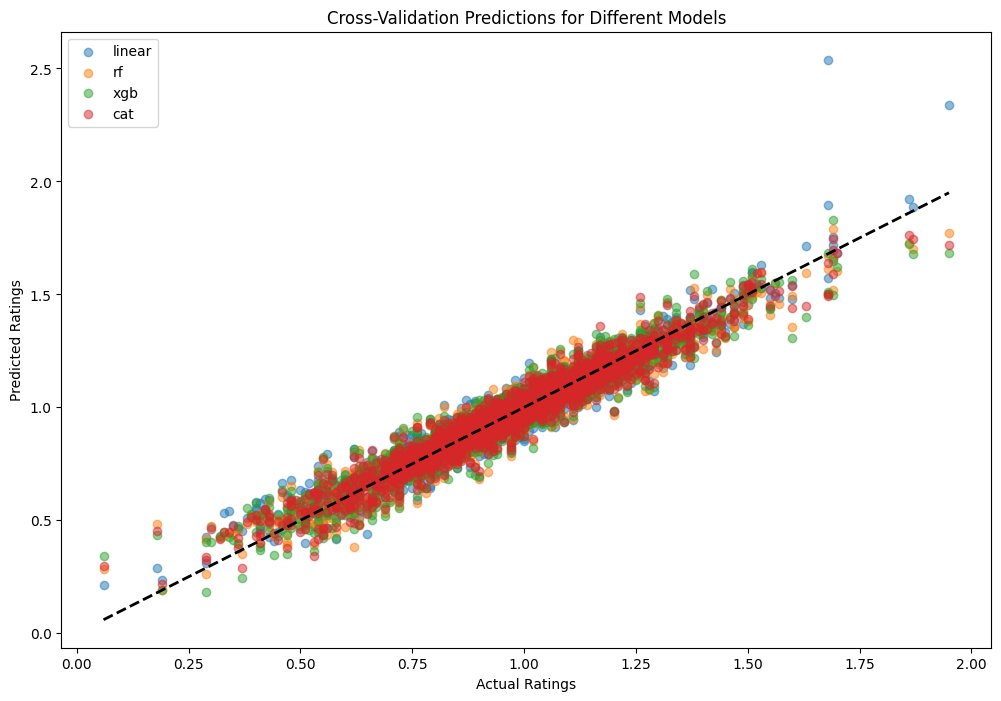

In [76]:
from sklearn.model_selection import cross_val_predict

plt.figure(figsize=(12, 8))

for model in models:
    y_pred = cross_val_predict(models[model], X, y, cv=5)
    plt.scatter(y, y_pred, alpha=0.5, label=model)

min_val, max_val = min(y), max(y)
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='dashed', linewidth=2)

plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Cross-Validation Predictions for Different Models")
plt.legend()
plt.show()


This is quite accurate, so I will use it for china rating. Especially since the fact that catboost handles null values well, so I can use it to predict rating values

In [65]:
models["cat"].fit(non_china_event.drop(columns=["Tournament", "Stage", "Match Type", "Player", "Teams", "Agents", "Rating", "Has never in a clutch position", "Clutch won", "Clutch played"]), non_china_event["Rating"])

china_event["Rating"] = models["cat"].predict(china_event.drop(columns=["Tournament", "Stage", "Match Type", "Player", "Teams", "Agents", "Rating", "Clutches (won/played)"]))
china_event["Rating"] = round(china_event["Rating"], 2)

In [73]:
import shap

explainer = shap.Explainer(models["cat"])
shap_values = explainer(X)

# Get mean absolute SHAP values for each feature
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": np.abs(shap_values.values).mean(axis=0)
}).sort_values(by="Importance", ascending=False)

We are done with adding rating to china event. For now, I may not be using any other missing values that is evident in china event

In [13]:
player_data["Player"].nunique() # there are 260 players

260

Next, since I'm determining who is the best player for each role in 2024, I think I will change the table a bit so that the player will be the main variable. From the code above, we can also know that there are 260 players in total.

I'm planning to group each player and get several important data from that and joined it all later in one dataframe like this. 

example : 
                
    player name      tournament played   regional winner     international winner    acs     kd      hs%       rating

    f0rsaken           20                   3                   0               500     3.4     50          1.76

    woot               100                  4                   0               400     2.4     24          1.4

    d4v4i              30                   5                   0               300     1.2     35          1.2

Next, I want to investigate one player first

In [19]:
df = player_data.copy() 

data = df.groupby("Player")
data.get_group("f0rsakeN")

,Player,Agents,Rounds Played,Rating,Average Combat Score,Kills:Deaths,"Kill, Assist, Trade, Survive %",Average Damage Per Round,Kills Per Round,Assists Per Round,...,Tournament_Champions Tour 2024: China Stage 2,Tournament_Champions Tour 2024: EMEA Kickoff,Tournament_Champions Tour 2024: EMEA Stage 1,Tournament_Champions Tour 2024: EMEA Stage 2,Tournament_Champions Tour 2024: Masters Madrid,Tournament_Champions Tour 2024: Masters Shanghai,Tournament_Champions Tour 2024: Pacific Kickoff,Tournament_Champions Tour 2024: Pacific Stage 1,Tournament_Champions Tour 2024: Pacific Stage 2,Tournament_Valorant Champions 2024
859,f0rsakeN,kayo,22,1.32,239,1.12,77.0,146.0,0.86,0.64,...,False,False,False,False,False,False,False,False,False,True
860,f0rsakeN,sova,21,0.85,182,0.82,62.0,123.0,0.67,0.24,...,False,False,False,False,False,False,False,False,False,True
917,f0rsakeN,breach,24,0.70,149,0.61,79.0,95.0,0.46,0.54,...,False,False,False,False,False,False,False,False,False,True
918,f0rsakeN,fade,19,1.11,157,1.63,84.0,113.0,0.68,0.32,...,False,False,False,False,False,False,False,False,False,True
945,f0rsakeN,breach,21,0.17,65,0.26,43.0,43.0,0.24,0.00,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14262,f0rsakeN,cypher,47,0.75,170,0.79,64.0,114.0,0.57,0.21,...,False,False,False,False,False,False,True,False,False,False
14263,f0rsakeN,fade,37,1.11,205,1.15,78.0,110.0,0.81,0.41,...,False,False,False,False,False,False,True,False,False,False
14264,f0rsakeN,harbor,23,0.89,203,0.94,78.0,142.0,0.74,0.35,...,False,False,False,False,False,False,True,False,False,False
14265,f0rsakeN,kayo,20,1.44,309,1.50,85.0,196.0,1.05,0.40,...,False,False,False,False,False,False,True,False,False,False


from code below, i was able to gain some valuable information. now, i want to generalize it and make a function instead

In [20]:
kangkang_data = data.get_group("ZmjjKK")

masters_shanghai_data = kangkang_data[kangkang_data["Tournament_Champions Tour 2024: Masters Shanghai"] == True]
masters_shanghai_data

# col = ["Rating", "Average Combat Score", "Kills:Deaths", "Kill, Assist, Trade, Survive %", "Average Damage Per Round",
#        "Kills Per Round", "Assists Per Round", "First Kills Per Round", "First Deaths Per Round", "Headshot %", "Clutch Success %"]

# for c in col:
#     kangkang_data[c] = kangkang_data["Rounds Played"] * kangkang_data[c]
# new_data = kangkang_data.sum().copy()
# rd = new_data["Rounds Played"]
# new_data[col] = new_data[col]/rd
# new_data = new_data.drop(labels=["Player", "Agents"])

# new_data["Maximum Kills in a Single Map"] = kangkang_data["Maximum Kills in a Single Map"].max()
# new_data["number of agents played"] = kangkang_data["Agents"].nunique()


# dic = data.get_group("ZmjjKK")["Agents"].value_counts().to_dict()
# dic

# roles = {"sentinel":0, "controller":0, "initiator":0, "duelist":0}

# for key in dic:
#     agent_role = inverted_agent_dictionary[key]
#     roles[agent_role] += dic[key]

# # Sum of all counts
# total = sum(roles.values())

# # Convert each count to a percentage
# percentages = {role: (count / total) * 100 for role, count in roles.items()}

# # Optionally, round the percentages
# percentages = {role: round(pct, 2) for role, pct in percentages.items()}

# for p in percentages:
#     new_data[p] = percentages[p]

# for tour in tournament_list:
#     new_data[f"Tournament_{tour}"] = new_data[f"Tournament_{tour}"] > 0

# new_data

,Player,Agents,Rounds Played,Rating,Average Combat Score,Kills:Deaths,"Kill, Assist, Trade, Survive %",Average Damage Per Round,Kills Per Round,Assists Per Round,...,Tournament_Champions Tour 2024: China Stage 2,Tournament_Champions Tour 2024: EMEA Kickoff,Tournament_Champions Tour 2024: EMEA Stage 1,Tournament_Champions Tour 2024: EMEA Stage 2,Tournament_Champions Tour 2024: Masters Madrid,Tournament_Champions Tour 2024: Masters Shanghai,Tournament_Champions Tour 2024: Pacific Kickoff,Tournament_Champions Tour 2024: Pacific Stage 1,Tournament_Champions Tour 2024: Pacific Stage 2,Tournament_Valorant Champions 2024
5754,ZmjjKK,raze,35,NaN,248,0.97,NaN,162.0,0.83,0.14,...,False,False,False,False,False,True,False,False,False,False
6012,ZmjjKK,raze,43,NaN,238,0.87,NaN,148.0,0.79,0.16,...,False,False,False,False,False,True,False,False,False,False
6496,ZmjjKK,raze,78,NaN,243,0.91,NaN,154.0,0.81,0.15,...,False,False,False,False,False,True,False,False,False,False


In [21]:
def get_data_from_player(df, player_name):
    data = df.groupby("Player")
    p_data = data.get_group(player_name)

    col = ["Rating", "Average Combat Score", "Kills:Deaths", "Kill, Assist, Trade, Survive %", "Average Damage Per Round",
       "Kills Per Round", "Assists Per Round", "First Kills Per Round", "First Deaths Per Round", "Headshot %", "Clutch Success %"]

    for c in col:
        p_data[c] = p_data["Rounds Played"] * p_data[c]
    
    new_data = p_data.sum().copy()
    rd = new_data["Rounds Played"]
    new_data[col] = new_data[col]/rd
    new_data = new_data.drop(labels=["Player", "Agents"])

    new_data["Maximum Kills in a Single Map"] = p_data["Maximum Kills in a Single Map"].max()
    new_data["number of agents played"] = p_data["Agents"].nunique()

    dic = data.get_group(player_name)["Agents"].value_counts().to_dict()
    dic

    roles = {"sentinel":0, "controller":0, "initiator":0, "duelist":0}

    for key in dic:
        agent_role = inverted_agent_dictionary[key]
        roles[agent_role] += dic[key]

    # Sum of all counts
    total = sum(roles.values())

    # Convert each count to a percentage
    percentages = {role: (count / total) * 100 for role, count in roles.items()}

    # Optionally, round the percentages
    percentages = {role: round(pct, 2) for role, pct in percentages.items()}

    for p in percentages:
        new_data[p] = percentages[p]

    for tour in tournament_list:
        new_data[f"Tournament_{tour}"] = new_data[f"Tournament_{tour}"] > 0

    new_data["Player"] = player_name

    return new_data


In [22]:
player_list = player_data["Player"].unique().tolist()
series_list = []

for player in player_list:
    player_vct_data = get_data_from_player(player_data, player)
    series_list.append(player_vct_data)

dataframe_player = pd.concat(series_list, axis = 1).T

cols = dataframe_player.columns.tolist()
dataframe_player = dataframe_player[[cols[-1]] + cols[:-1]]
dataframe_player

,Player,Rounds Played,Rating,Average Combat Score,Kills:Deaths,"Kill, Assist, Trade, Survive %",Average Damage Per Round,Kills Per Round,Assists Per Round,First Kills Per Round,...,Tournament_Champions Tour 2024: Masters Shanghai,Tournament_Champions Tour 2024: Pacific Kickoff,Tournament_Champions Tour 2024: Pacific Stage 1,Tournament_Champions Tour 2024: Pacific Stage 2,Tournament_Valorant Champions 2024,number of agents played,sentinel,controller,initiator,duelist
0,Boo,4734,0.770165,173.36185,0.984278,58.041191,111.285594,0.620059,0.409463,0.080355,...,True,False,False,False,True,6,4.9,88.24,6.86,0.0
1,benjyfishy,4734,0.832256,198.49831,1.154472,56.256654,132.659273,0.737607,0.186538,0.088754,...,True,False,False,False,True,3,76.34,23.66,0.0,0.0
2,Wo0t,3738,0.778419,215.038523,1.103424,55.599786,140.73435,0.748601,0.318874,0.135037,...,True,False,False,False,True,11,0.0,16.3,56.52,27.17
3,MiniBoo,3750,1.013904,220.162133,1.050776,71.4352,144.234133,0.765011,0.218616,0.174176,...,False,False,False,False,True,5,0.0,0.0,7.14,92.86
4,RieNs,4734,0.865256,205.85319,1.119438,59.834601,138.411914,0.722655,0.354052,0.077022,...,True,False,False,False,True,6,0.0,6.67,93.33,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,jakee,324,0.964136,171.191358,0.897191,73.975309,113.32716,0.60429,0.3875,0.04321,...,False,False,False,False,False,3,0.0,100.0,0.0,0.0
256,wippie,324,0.989877,179.469136,1.015494,73.549383,119.734568,0.605802,0.223272,0.066914,...,False,False,False,False,False,2,50.0,50.0,0.0,0.0
257,Egoist,244,1.062336,202.147541,1.108607,75.418033,132.008197,0.745861,0.228402,0.084713,...,False,True,False,False,False,3,71.43,0.0,28.57,0.0
258,Destrian,476,0.842374,156.85084,0.789916,68.586134,112.008403,0.537521,0.319055,0.058718,...,False,False,False,False,False,4,57.14,42.86,0.0,0.0


In [23]:
dataframe_player[['Rating', 'Average Combat Score',
       'Kills:Deaths', 'Kill, Assist, Trade, Survive %',
       'Average Damage Per Round', 'Kills Per Round', 'Assists Per Round',
       'First Kills Per Round', 'First Deaths Per Round', 'Headshot %',
       'Clutch Success %','sentinel', 'controller', 'initiator', 'duelist']] = dataframe_player[['Rating', 'Average Combat Score',
       'Kills:Deaths', 'Kill, Assist, Trade, Survive %',
       'Average Damage Per Round', 'Kills Per Round', 'Assists Per Round',
       'First Kills Per Round', 'First Deaths Per Round', 'Headshot %',
       'Clutch Success %','sentinel', 'controller', 'initiator', 'duelist']].astype(float)

dataframe_player[['Rounds Played', 'Maximum Kills in a Single Map', 'Kills', 'Deaths',
       'Assists', 'First Kills', 'First Deaths', 'Clutch won', 'Clutch played','number of agents played']] = dataframe_player[['Rounds Played', 'Maximum Kills in a Single Map', 'Kills', 'Deaths',
       'Assists', 'First Kills', 'First Deaths', 'Clutch won', 'Clutch played','number of agents played']].astype(int)

dataframe_player[['Tournament_Champions Tour 2024: Americas Kickoff',
       'Tournament_Champions Tour 2024: Americas Stage 1',
       'Tournament_Champions Tour 2024: Americas Stage 2',
       'Tournament_Champions Tour 2024: China Kickoff',
       'Tournament_Champions Tour 2024: China Stage 1',
       'Tournament_Champions Tour 2024: China Stage 2',
       'Tournament_Champions Tour 2024: EMEA Kickoff',
       'Tournament_Champions Tour 2024: EMEA Stage 1',
       'Tournament_Champions Tour 2024: EMEA Stage 2',
       'Tournament_Champions Tour 2024: Masters Madrid',
       'Tournament_Champions Tour 2024: Masters Shanghai',
       'Tournament_Champions Tour 2024: Pacific Kickoff',
       'Tournament_Champions Tour 2024: Pacific Stage 1',
       'Tournament_Champions Tour 2024: Pacific Stage 2',
       'Tournament_Valorant Champions 2024']] = dataframe_player[['Tournament_Champions Tour 2024: Americas Kickoff',
       'Tournament_Champions Tour 2024: Americas Stage 1',
       'Tournament_Champions Tour 2024: Americas Stage 2',
       'Tournament_Champions Tour 2024: China Kickoff',
       'Tournament_Champions Tour 2024: China Stage 1',
       'Tournament_Champions Tour 2024: China Stage 2',
       'Tournament_Champions Tour 2024: EMEA Kickoff',
       'Tournament_Champions Tour 2024: EMEA Stage 1',
       'Tournament_Champions Tour 2024: EMEA Stage 2',
       'Tournament_Champions Tour 2024: Masters Madrid',
       'Tournament_Champions Tour 2024: Masters Shanghai',
       'Tournament_Champions Tour 2024: Pacific Kickoff',
       'Tournament_Champions Tour 2024: Pacific Stage 1',
       'Tournament_Champions Tour 2024: Pacific Stage 2',
       'Tournament_Valorant Champions 2024']].astype(bool)

In [24]:
dataframe_player

,Player,Rounds Played,Rating,Average Combat Score,Kills:Deaths,"Kill, Assist, Trade, Survive %",Average Damage Per Round,Kills Per Round,Assists Per Round,First Kills Per Round,...,Tournament_Champions Tour 2024: Masters Shanghai,Tournament_Champions Tour 2024: Pacific Kickoff,Tournament_Champions Tour 2024: Pacific Stage 1,Tournament_Champions Tour 2024: Pacific Stage 2,Tournament_Valorant Champions 2024,number of agents played,sentinel,controller,initiator,duelist
0,Boo,4734,0.770165,173.361850,0.984278,58.041191,111.285594,0.620059,0.409463,0.080355,...,True,False,False,False,True,6,4.90,88.24,6.86,0.00
1,benjyfishy,4734,0.832256,198.498310,1.154472,56.256654,132.659273,0.737607,0.186538,0.088754,...,True,False,False,False,True,3,76.34,23.66,0.00,0.00
2,Wo0t,3738,0.778419,215.038523,1.103424,55.599786,140.734350,0.748601,0.318874,0.135037,...,True,False,False,False,True,11,0.00,16.30,56.52,27.17
3,MiniBoo,3750,1.013904,220.162133,1.050776,71.435200,144.234133,0.765011,0.218616,0.174176,...,False,False,False,False,True,5,0.00,0.00,7.14,92.86
4,RieNs,4734,0.865256,205.853190,1.119438,59.834601,138.411914,0.722655,0.354052,0.077022,...,True,False,False,False,True,6,0.00,6.67,93.33,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,jakee,324,0.964136,171.191358,0.897191,73.975309,113.327160,0.604290,0.387500,0.043210,...,False,False,False,False,False,3,0.00,100.00,0.00,0.00
256,wippie,324,0.989877,179.469136,1.015494,73.549383,119.734568,0.605802,0.223272,0.066914,...,False,False,False,False,False,2,50.00,50.00,0.00,0.00
257,Egoist,244,1.062336,202.147541,1.108607,75.418033,132.008197,0.745861,0.228402,0.084713,...,False,True,False,False,False,3,71.43,0.00,28.57,0.00
258,Destrian,476,0.842374,156.850840,0.789916,68.586134,112.008403,0.537521,0.319055,0.058718,...,False,False,False,False,False,4,57.14,42.86,0.00,0.00


now, i think i finish the preprocessing. time to analyze the data